In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import collections
from collections import Counter as count

# *Data Ingestion :*

In [2]:
data=pd.read_csv('turkiye-student-evaluation_generic.csv')
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
data.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

In [17]:
data.shape

(5820, 33)

### *Null Values :*

In [5]:
data.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

**There are no null values in a given dataset.**

### *Descriptive Statistics :*

In [6]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


**Inference :**
* Descrpitive statistics of columns difficulty, Q1, Q2....Q28 are almost same.
* Mean and Median of class column approximately same.


In [7]:
data.shape

(5820, 33)

# *Exploratory Data Analysis :*

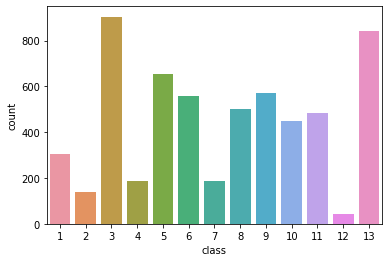

In [9]:
sns.countplot(x='class',data=data)
plt.show()

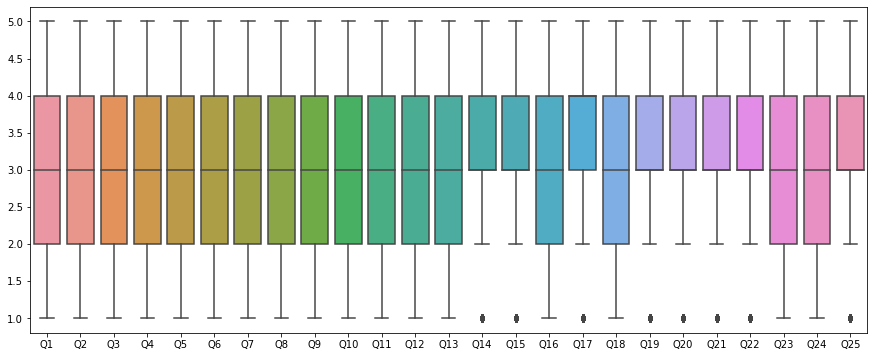

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data.loc[:,'Q1':'Q25'])
plt.show()

**It was observed that Q14,Q15,Q17,Q19:Q22 and Q25 questions with good rating.**

# *Scaling :*

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(data),columns=data.columns)

# *K Means Clustering :*

In [21]:
from sklearn.cluster import KMeans

In [23]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10, max_iter=100)
    clusters.fit(data)
    
    cluster_errors.append(clusters.inertia_)
    
pd.DataFrame({'num_clusters':cluster_range, 'Error': cluster_errors})

,num_clusters,Error
0,1,192060.000000
1,2,105150.066550
2,3,73956.576471
3,4,65555.495052
4,5,60429.485186
5,6,57626.854512
6,7,55865.754207
7,8,54474.669729
8,9,53223.880919


### *Elbow Plot :* 

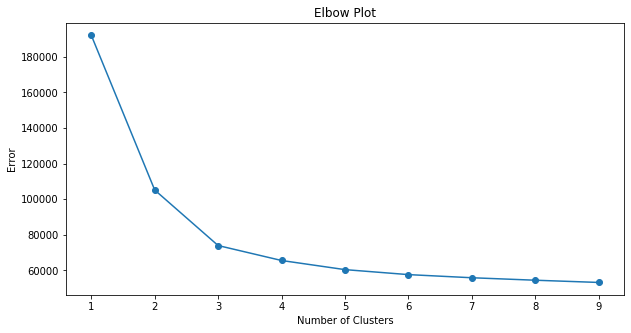

In [24]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(cluster_range)
plt.show()

**Based on the elbow graph we can go for 3 clusters.**

In [25]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(data)

In [27]:
y_kmeans

array([2, 2, 0, ..., 0, 1, 1])

In [34]:
count(y_kmeans)

Counter({2: 2365, 0: 2225, 1: 1230})

**Above count was the count of 3 clusters.**

# *Hierarchical Clustering :*

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage

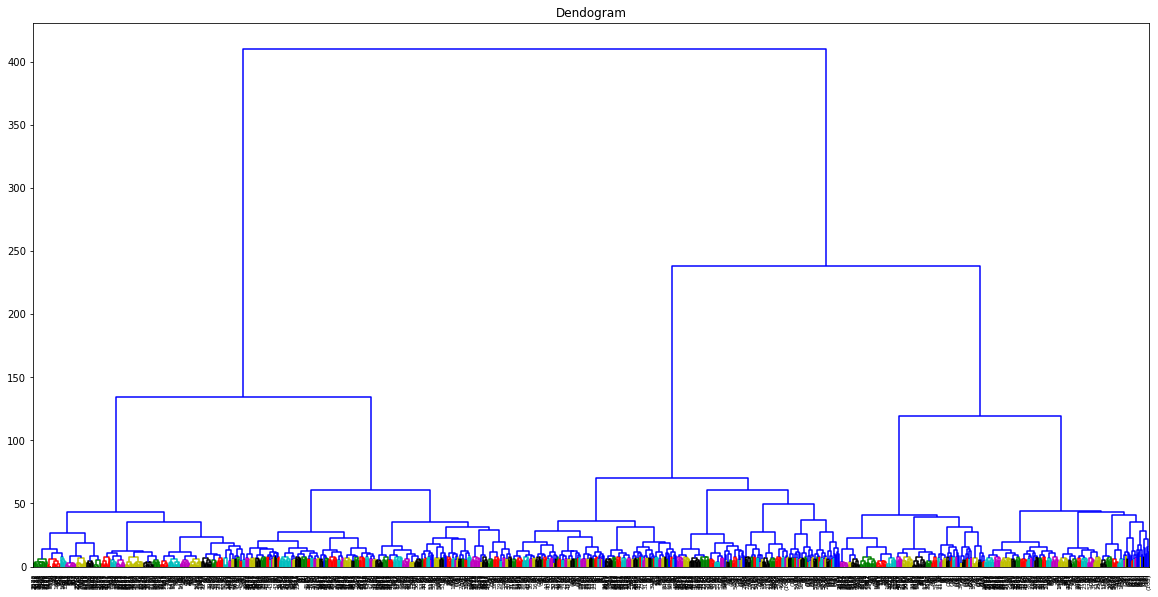

In [43]:
plt.figure(figsize=(20,10))
Z = linkage(data, method='ward')
dendrogram(Z, leaf_rotation=90, p=10, truncate_mode='level', leaf_font_size=6, color_threshold=8)
plt.title('Dendogram')
plt.show()

**By the Dendogram we can see that there are 3 optimal number of clusters.**

**Now fit Hierarchical clustering to the data**

## *Agglomerative Clustering :*

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
ac.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [48]:
ac.labels_

array([2, 2, 1, ..., 1, 0, 0], dtype=int64)

In [49]:
y_ac=ac.fit_predict(data)

In [50]:
count(y_ac)

Counter({2: 2093, 1: 2173, 0: 1554})

In [51]:
first0=[2225,1554]
second1=[1230,2173]
third2=[2365,2093]
clusters=['Kmeans','Agglm Cluster']
d=pd.DataFrame({'Clusters':clusters,'FirstC':first0,'SecondC':second1,'ThirdC':third2})
d

,Clusters,FirstC,SecondC,ThirdC
0,Kmeans,2225,1230,2365
1,Agglm Cluster,1554,2173,2093


**Inference :**
* From the above dataframe we can compare the clusters of both the algorithmns.
* Third cluster number from both methods was almost close.

# *Convert Unsupervised data into Supervised data :*

In [52]:
df=data.copy()

In [53]:
kmeans = KMeans(3, n_init=5, max_iter=100)
kmeans.fit(df)
df['label'] = kmeans.labels_
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2


In [55]:
df['label'].value_counts()

1    2365
0    2225
2    1230
Name: label, dtype: int64

In [ ]:
sns.pairplot(df,hue='label')
plt.show()

# *PCA :*

**Since the data is already scaled , now apllying PCA fro dimensionality reduction :** 

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
data_pca= pca.transform(data)
data_pca.shape

(5820, 33)

In [62]:
pca.components_

array([[ 0.02702299,  0.00763628,  0.00904588, ..., -0.1915978 ,
        -0.18721786, -0.1883336 ],
       [-0.07289543, -0.04063568, -0.00266056, ...,  0.03244089,
        -0.001601  ,  0.0978247 ],
       [-0.4385327 , -0.05890652, -0.05937739, ..., -0.11049305,
        -0.07491874, -0.1782587 ],
       ...,
       [-0.00853126,  0.00216576, -0.00279446, ...,  0.01915656,
        -0.02403839, -0.0265742 ],
       [ 0.00364928,  0.00044748, -0.00320714, ..., -0.01714022,
        -0.01096761, -0.01669541],
       [ 0.00057773,  0.0025222 ,  0.00431929, ..., -0.0080973 ,
        -0.04233965,  0.07289184]])

In [63]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.70013168, 0.74537307, 0.78256401, 0.81671962, 0.84803889,
       0.8727493 , 0.88870744, 0.9004264 , 0.9109943 , 0.91970124,
       0.92737397, 0.93353888, 0.9390824 , 0.94424931, 0.94854474,
       0.95272728, 0.95685887, 0.96045734, 0.96397825, 0.96742752,
       0.97073759, 0.9739328 , 0.97697171, 0.97985678, 0.98266244,
       0.98522485, 0.98777721, 0.9902038 , 0.99254658, 0.99468954,
       0.99673926, 0.99842948, 1.        ])

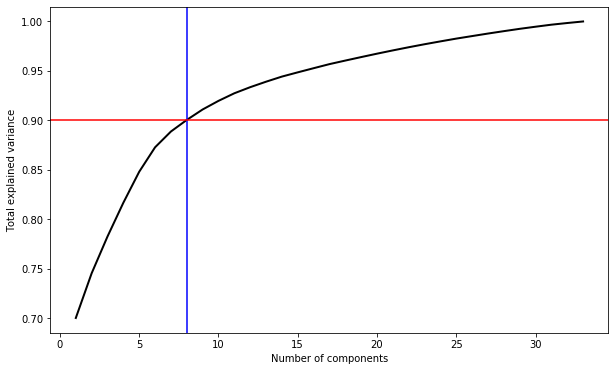

In [68]:
plt.figure(figsize=(10,6))

plt.plot(range(1,34), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()

**90 percent of data consists 8 components.**

In [69]:
pca = PCA(n_components=8)
pca.fit(data)
data_pca = pd.DataFrame(pca.transform(data))
data_pca.shape

(5820, 8)

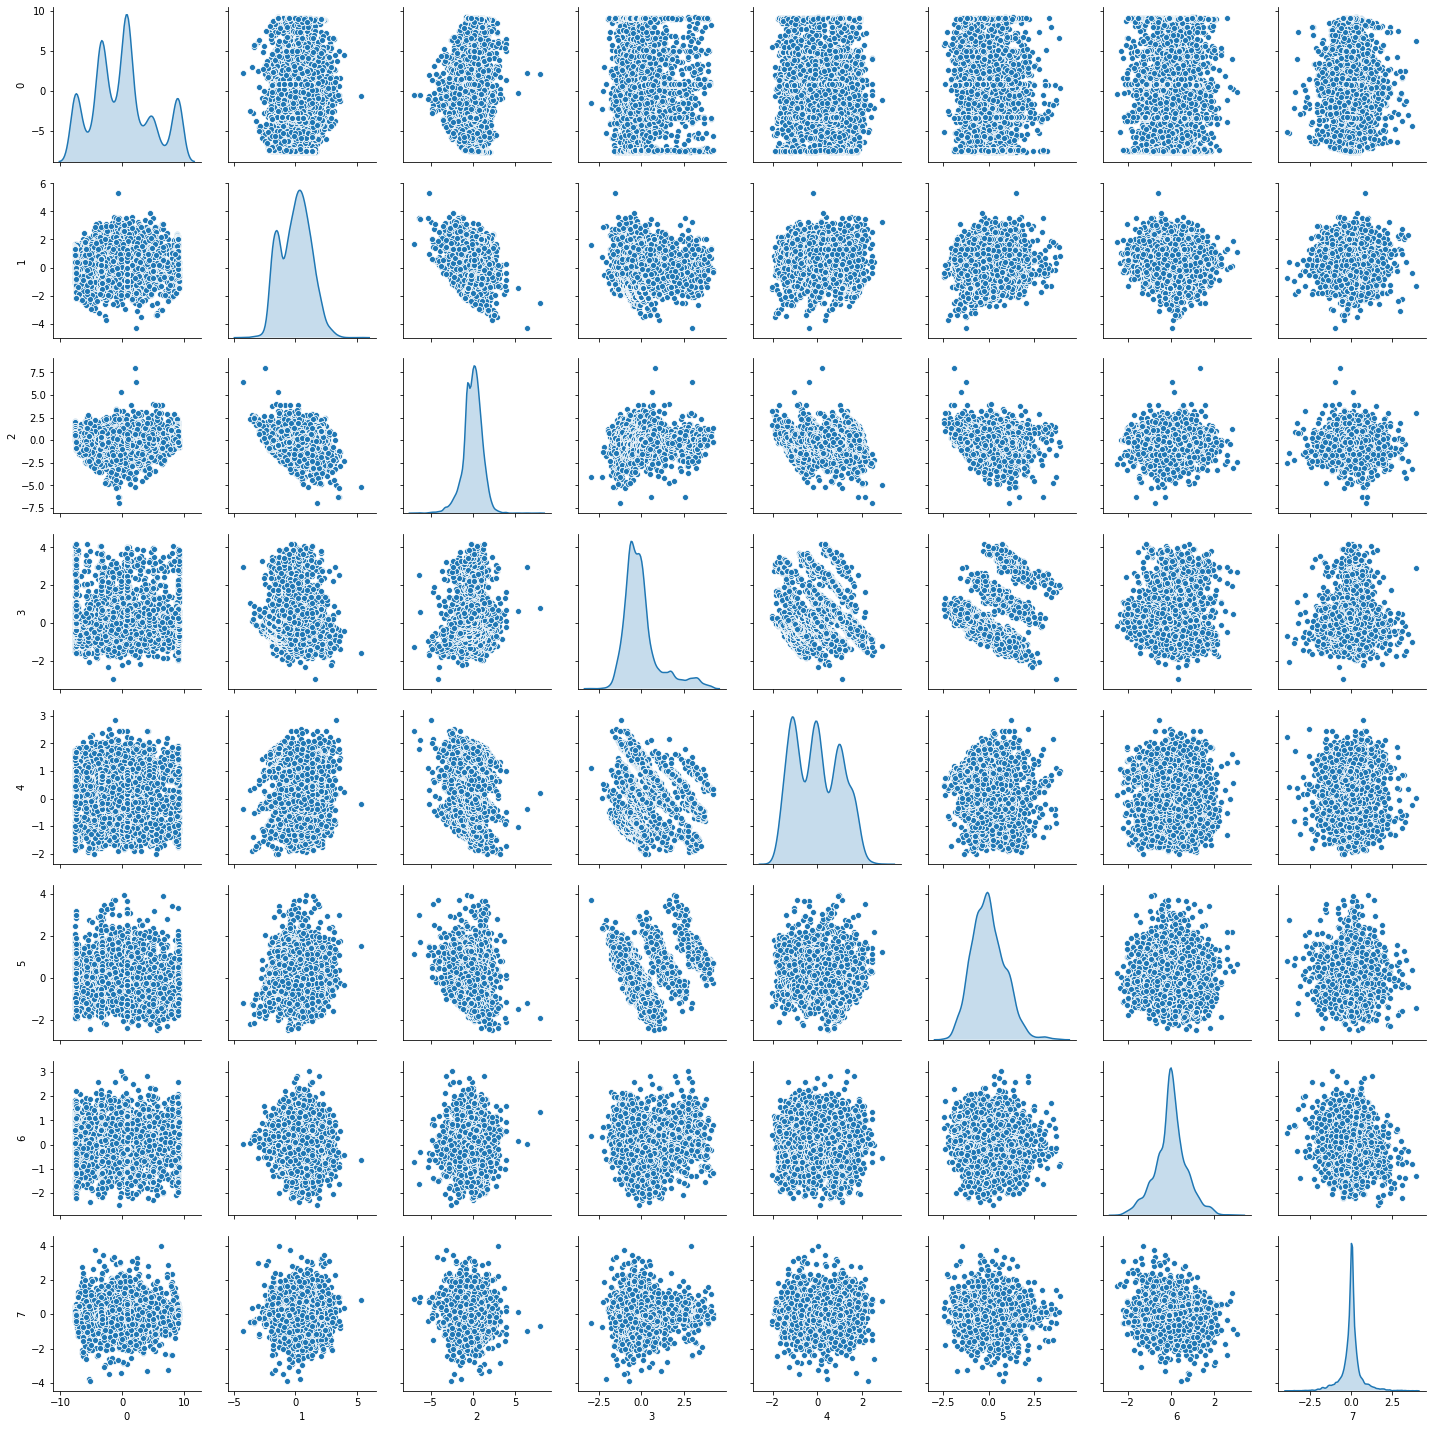

In [70]:
sns.pairplot(data_pca, diag_kind='kde')
plt.show()

### *Kmeans Clustering :*

In [71]:
cluster_range = range(1,16)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=10, max_iter=100)
    clusters.fit(data_pca)
    
    cluster_errors.append(clusters.inertia_)
    
pd.DataFrame({'num_clusters':cluster_range, 'Error': cluster_errors})

,num_clusters,Error
0,1,172935.883347
1,2,86036.172095
2,3,54858.424598
3,4,46470.738572
4,5,41391.714630
5,6,38617.365795
6,7,36846.122436
7,8,35566.483923
8,9,34217.544545
9,10,32937.776704


**Elbow Plot :**

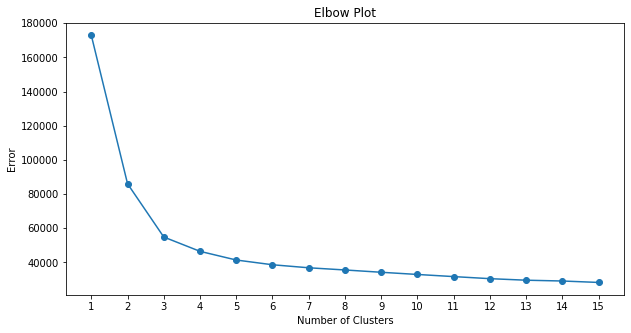

In [72]:
plt.figure(figsize=(10,5))
plt.plot(cluster_range, cluster_errors, marker = "o" )
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.xticks(cluster_range)
plt.show()

In [80]:
pca_df = data_pca.copy()
kmeans = KMeans(3, n_init=10, max_iter=100)
kmeans.fit(pca_df)
pca_df['label'] = kmeans.labels_
pca_df['label'].value_counts()

2    2363
0    2226
1    1231
Name: label, dtype: int64

### *Agglomerative Clustering :*

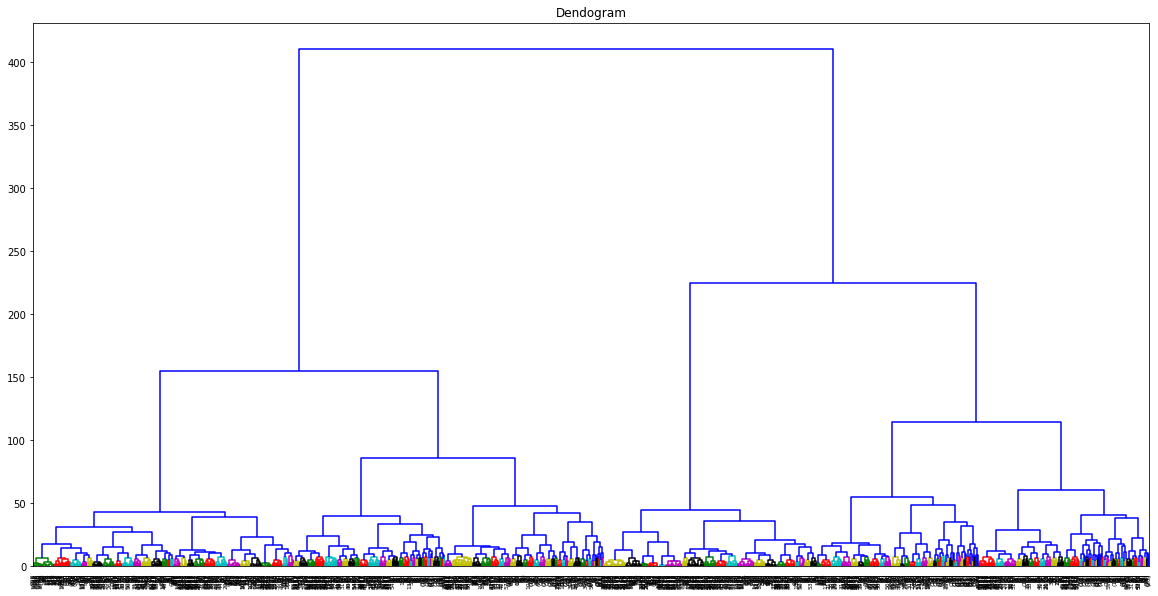

In [75]:
plt.figure(figsize=(20,10))
link = linkage(data_pca, method='ward')
dendrogram(link, leaf_rotation=90, p=10, truncate_mode='level', leaf_font_size=6, color_threshold=8)
plt.title('Dendogram')
plt.show()

**From the above dendogram we can see 3 clusters.**

In [76]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
ac.fit(data_pca)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [78]:
y_ac=ac.fit_predict(data_pca)

In [79]:
count(y_ac)

Counter({1: 2379, 0: 2756, 2: 685})

In [81]:
first0=[2226,2756]
second1=[1231,2379]
third2=[2363,685]
clusters=['Kmeans','Agglm Cluster']
d=pd.DataFrame({'Clusters':clusters,'FirstC':first0,'SecondC':second1,'ThirdC':third2})
d

,Clusters,FirstC,SecondC,ThirdC
0,Kmeans,2226,1231,2363
1,Agglm Cluster,2756,2379,685


**Inference :**
* First cluster is some what nearer in both the methods.

# *Splitting the data before PCA :*

In [82]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,label
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,...,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265,0
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,1
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2


In [83]:
X=df.drop(columns='label')
y=df['label']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4074, 33)
(1746, 33)
(4074,)
(1746,)


### *Logistic Regression :*

In [90]:
from sklearn import metrics

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
print('Training score =', lr.score(Xtrain, ytrain))
print('Test score =', lr.score(Xtest, ytest))

Training score = 0.9855179185076093
Test score = 0.9747995418098511


In [89]:
ypred1=lr.predict(Xtest)

In [100]:
acc1=(metrics.accuracy_score(ytest,ypred1))
acc1

0.9747995418098511

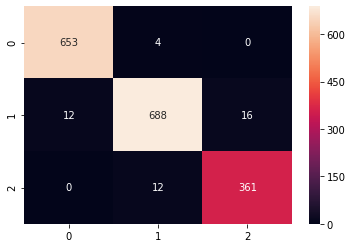

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred1)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

**Model is good fit.**

### *Decision Tree Classifier :*

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

print('Training score =', dt.score(Xtrain, ytrain))
print('Test score =', dt.score(Xtest, ytest))

Training score = 1.0
Test score = 0.938717067583047


In [96]:
ypred2=dt.predict(Xtest)

In [97]:
acc2=(metrics.accuracy_score(ytest,ypred2))
acc2

0.938717067583047

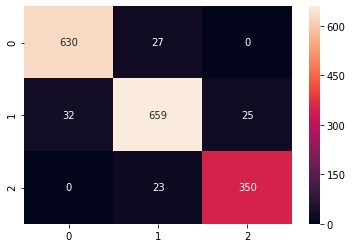

In [130]:
cm = confusion_matrix(ytest, ypred2)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

**Model is under fit.**

### *KNN :*

In [98]:
from sklearn.neighbors import KNeighborsClassifier

score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    ypred3=knn.predict(Xtest)
    accuracy=metrics.accuracy_score(ypred3,ytest)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9587628865979382
2 :  0.9524627720504009
3 :  0.9593356242840779
4 :  0.9576174112256587
5 :  0.9599083619702177
6 :  0.9599083619702177
7 :  0.9633447880870561
8 :  0.9604810996563574
9 :  0.9639175257731959
10 :  0.9604810996563574
11 :  0.9604810996563574
12 :  0.9604810996563574
13 :  0.9621993127147767
14 :  0.9610538373424972
15 :  0.9604810996563574
16 :  0.9604810996563574
17 :  0.9610538373424972
18 :  0.9604810996563574
19 :  0.9627720504009164
20 :  0.9610538373424972
21 :  0.9616265750286369
22 :  0.9581901489117984
23 :  0.9587628865979382
24 :  0.9576174112256587
25 :  0.9558991981672395
26 :  0.9564719358533792
27 :  0.9576174112256587
28 :  0.95475372279496
29 :  0.9558991981672395
30 :  0.9564719358533792
31 :  0.9581901489117984
32 :  0.9570446735395189
33 :  0.9581901489117984
34 :  0.9570446735395189
35 :  0.9558991981672395
36 :  0.9570446735395189
37 :  0.9570446735395189
38 :  0.9553264604810997
39 :  0.9558991981672395
40 :  0.9553264604810997
41 :  0.955

In [101]:
score.index(max(score))+1

9

In [102]:
round(max(score))

96.0

In [103]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(Xtrain, ytrain)

print('Training score =', knn.score(Xtrain, ytrain))
print('Test score =', knn.score(Xtest, ytest))

Training score = 0.976926853215513
Test score = 0.9639175257731959


**Model is good fit:**

### *Naive Bayes :*

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

print('Training score =', gnb.score(Xtrain, ytrain))
print('Test score =', gnb.score(Xtest, ytest))

Training score = 0.9879725085910653
Test score = 0.9879725085910653


**Model is Best Fit.**

In [106]:
Algorithm=['LogisticRegression','Decision Tree','KNN','Naive Bayes']
Train_Accuracy=[0.985,1.00,0.977,0.988]
Test_Accuracy=[0.975,0.939,0.963,0.988]

In [108]:
Before_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Before_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.985,0.975
1,Decision Tree,1.000,0.939
2,KNN,0.977,0.963
3,Naive Bayes,0.988,0.988


**Inference :**
* Naive Bayes algorithm has performed well with an accuracy 0f 98.8 percent.
* Decision Tree has not performed well and it is under fit.

# *Splitting the data after PCA :*

In [109]:
df1=data_pca.copy()

In [110]:
kmeans = KMeans(3, n_init=5, max_iter=100)
kmeans.fit(df1)
df1['label'] = kmeans.labels_
df1.head()

,0,1,2,3,4,5,6,7,label
0,0.742313,-0.109720,1.314249,-1.204991,-0.270151,1.967465,-1.256606,-0.213717,2
1,0.727500,-0.147146,1.281206,-1.411373,-0.169145,1.776011,-0.331677,0.002878,2
2,-7.586498,0.364230,1.519714,-1.093795,-0.341107,1.509402,-0.487974,-0.019885,0
3,0.727500,-0.147146,1.281206,-1.411373,-0.169145,1.776011,-0.331677,0.002878,2
4,9.054785,-1.113471,0.825711,-1.913832,0.105925,2.042082,0.308013,0.148645,1


In [111]:
X1=df1.drop(columns='label')
y1=df1['label']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4074, 8)
(1746, 8)
(4074,)
(1746,)


### *Logistic Regression :*

In [113]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)
print('Training score =', lr_pca.score(X_train, y_train))
print('Test score =', lr_pca.score(X_test, y_test))

Training score = 0.9869906725576829
Test score = 0.979381443298969


**Model is good fit.**

### *Decision Tree Classifier :*

In [114]:
dt_pca = DecisionTreeClassifier()
dt_pca.fit(X_train, y_train)
print('Training score =', dt_pca.score(X_train, y_train))
print('Test score =', dt_pca.score(X_test, y_test))

Training score = 1.0
Test score = 0.995418098510882


**Model is somewhat underfit.**

### *KNN :*

In [118]:
score=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    ypred=knn.predict(X_test)
    accuracy=metrics.accuracy_score(ypred,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.9707903780068728
2 :  0.9599083619702177
3 :  0.9765177548682703
4 :  0.9707903780068728
5 :  0.9765177548682703
6 :  0.97709049255441
7 :  0.9799541809851088
8 :  0.9747995418098511
9 :  0.9776632302405498
10 :  0.97709049255441
11 :  0.97709049255441
12 :  0.9759450171821306
13 :  0.9765177548682703
14 :  0.9742268041237113
15 :  0.9765177548682703
16 :  0.97709049255441
17 :  0.97709049255441
18 :  0.9776632302405498
19 :  0.9788087056128293
20 :  0.9788087056128293
21 :  0.9799541809851088
22 :  0.9782359679266895
23 :  0.979381443298969
24 :  0.9776632302405498
25 :  0.9782359679266895
26 :  0.9776632302405498
27 :  0.9765177548682703
28 :  0.9747995418098511
29 :  0.9765177548682703
30 :  0.9730813287514318
31 :  0.9742268041237113
32 :  0.9736540664375716
33 :  0.9765177548682703
34 :  0.9753722794959908
35 :  0.9765177548682703
36 :  0.9759450171821306
37 :  0.9759450171821306
38 :  0.9759450171821306
39 :  0.9753722794959908
40 :  0.9753722794959908
41 :  0.974799541809

In [119]:
score.index(max(score))+1

7

In [120]:
(max(score))

97.99541809851088

In [121]:
knn_pca = KNeighborsClassifier(n_neighbors=7)
knn_pca.fit(X_train, y_train)

print('Training score =', knn_pca.score(X_train, y_train))
print('Test score =', knn_pca.score(X_test, y_test))

Training score = 0.9874815905743741
Test score = 0.9799541809851088


**Model is good fit.**

### *Naive Bayes :*

In [122]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train, y_train)
print('Training score =', gnb_pca.score(X_train, y_train))
print('Test score =', gnb_pca.score(X_test, y_test))

Training score = 0.9759450171821306
Test score = 0.9673539518900344


**Model is good fit.**

In [123]:
Algorithm=['LogisticRegression','Decision Tree','KNN','Naive Bayes']
Train_Accuracy=[0.987,1.00,0.987,0.975]
Test_Accuracy=[0.979,0.995,0.980,0.967]

In [124]:
After_PCA = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
After_PCA

,Algorithm,Train_Accuracy,Test_Accuracy
0,LogisticRegression,0.987,0.979
1,Decision Tree,1.000,0.995
2,KNN,0.987,0.980
3,Naive Bayes,0.975,0.967


**Inference :**
* All the models performed well.
* Decision Tree has 100% on training and 99.5% on testing.

# *Final Model :*

In [125]:
Algorithm=['LR BPCA','DT BPCA','KNN BPCA','NB BPCA','LR APCA','DT APCA','KNN APCA','NB APCA']
Train_Accuracy=[0.985,1.00,0.977,0.988,0.987,1.00,0.987,0.975]
Test_Accuracy=[0.975,0.939,0.963,0.988,0.979,0.995,0.980,0.967]

In [126]:
Final = pd.DataFrame({'Algorithm': Algorithm,'Train_Accuracy': Train_Accuracy,'Test_Accuracy':Test_Accuracy})
Final

,Algorithm,Train_Accuracy,Test_Accuracy
0,LR BPCA,0.985,0.975
1,DT BPCA,1.000,0.939
2,KNN BPCA,0.977,0.963
3,NB BPCA,0.988,0.988
4,LR APCA,0.987,0.979
5,DT APCA,1.000,0.995
6,KNN APCA,0.987,0.980
7,NB APCA,0.975,0.967


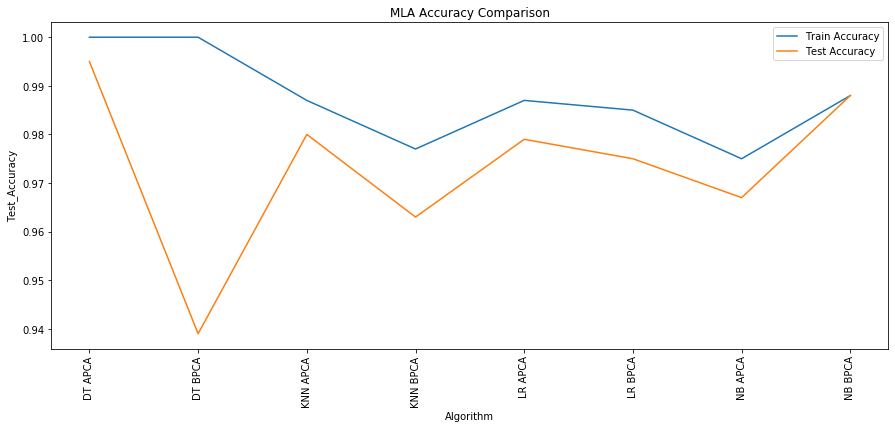

In [127]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="Algorithm", y="Train_Accuracy",data=Final,palette='hot',label='Train Accuracy')
sns.lineplot(x="Algorithm", y="Test_Accuracy",data=Final,palette='hot',label='Test Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

**Inference :**
* Naive Bayes before PCA  performed well.
* Logistic Regression after PCA performed well.
* Naive Bayes(Before PCA) is the best model from all the model where training and testing sores are equal.